In [ ]:
!wget https://isic-challenge-data.s3.amazonaws.com/2016/ISBI2016_ISIC_Part3_Training_Data.zip
!wget https://isic-challenge-data.s3.amazonaws.com/2016/ISBI2016_ISIC_Part3_Test_Data.zip
!wget https://isic-challenge-data.s3.amazonaws.com/2016/ISBI2016_ISIC_Part3_Training_GroundTruth.csv
!wget https://isic-challenge-data.s3.amazonaws.com/2016/ISBI2016_ISIC_Part3_Test_GroundTruth.csv

--2024-05-04 15:08:35--  https://isic-challenge-data.s3.amazonaws.com/2016/ISBI2016_ISIC_Part3_Training_Data.zip
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 3.5.8.187, 3.5.28.52, 3.5.1.166, ...
Connecting to isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)|3.5.8.187|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 631625308 (602M) [application/zip]
Saving to: ‘ISBI2016_ISIC_Part3_Training_Data.zip’

ISBI2016_ISIC_Part3 100%[===================>] 602.36M  33.5MB/s    in 25s     

2024-05-04 15:09:00 (24.3 MB/s) - ‘ISBI2016_ISIC_Part3_Training_Data.zip’ saved [631625308/631625308]

--2024-05-04 15:09:00--  https://isic-challenge-data.s3.amazonaws.com/2016/ISBI2016_ISIC_Part3_Test_Data.zip
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 52.217.117.41, 52.216.177.67, 52.216.133.115, ...
Connecting to isic-challenge-data.s3.amazonaws.com (isic-challenge-d

In [ ]:
import os
import glob
import tempfile
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
directory = "/content/drive/MyDrive/Colab Notebooks/ELEC4840/Project/2016/"

root_dir = tempfile.mkdtemp() if directory is None else directory
os.chdir(root_dir)
os.listdir('.')

['2016_ResNet.ipynb',
 'ISBI2016_ISIC_Part3_Test_Data.zip',
 'ISBI2016_ISIC_Part3_Test_GroundTruth.csv',
 'ISBI2016_ISIC_Part3_Training_Data.zip',
 'ISBI2016_ISIC_Part3_Training_GroundTruth.csv']

In [ ]:
!unzip "./ISBI2016_ISIC_Part3_Training_Data.zip"
!unzip "./ISBI2016_ISIC_Part3_Test_Data.zip"

Archive:  ./ISBI2016_ISIC_Part3_Training_Data.zip
 extracting: ISBI2016_ISIC_Part3_Training_Data/ISIC_0000000.jpg  
 extracting: ISBI2016_ISIC_Part3_Training_Data/ISIC_0000001.jpg  
 extracting: ISBI2016_ISIC_Part3_Training_Data/ISIC_0000002.jpg  
 extracting: ISBI2016_ISIC_Part3_Training_Data/ISIC_0000004.jpg  
 extracting: ISBI2016_ISIC_Part3_Training_Data/ISIC_0000006.jpg  
 extracting: ISBI2016_ISIC_Part3_Training_Data/ISIC_0000007.jpg  
 extracting: ISBI2016_ISIC_Part3_Training_Data/ISIC_0000008.jpg  
 extracting: ISBI2016_ISIC_Part3_Training_Data/ISIC_0000009.jpg  
 extracting: ISBI2016_ISIC_Part3_Training_Data/ISIC_0000010.jpg  
 extracting: ISBI2016_ISIC_Part3_Training_Data/ISIC_0000011.jpg  
 extracting: ISBI2016_ISIC_Part3_Training_Data/ISIC_0000016.jpg  
 extracting: ISBI2016_ISIC_Part3_Training_Data/ISIC_0000017.jpg  
 extracting: ISBI2016_ISIC_Part3_Training_Data/ISIC_0000018.jpg  
 extracting: ISBI2016_ISIC_Part3_Training_Data/ISIC_0000019.jpg  
 extracting: ISBI2016_ISIC

In [ ]:
import os

if not os.path.exists("./train"):
    os.makedirs("./train")
    os.makedirs("./train/benign")
    os.makedirs("./train/malignant")

if not os.path.exists("./val"):
    os.makedirs("./val")
    os.makedirs("./val/benign")
    os.makedirs("./val/malignant")

if not os.path.exists("./test"):
    os.makedirs("./test")
    os.makedirs("./test/benign")
    os.makedirs("./test/malignant")

In [ ]:
import shutil
import pandas as pd
import numpy as np

df = pd.read_csv("./ISBI2016_ISIC_Part3_Training_GroundTruth.csv")
img_lis = []
lbl_lis = []
img_lis.append("ISIC_0000000")
lbl_lis.append("benign")

for i in range(len(df)):
    name, label = df["ISIC_0000000"][i], df["benign"][i]
    img_lis.append(name)
    lbl_lis.append(label)

N_train_val = len(img_lis)
N_train = int(N_train_val * 0.8)
print(N_train_val)
print(N_train)

shuffle_ix = np.random.permutation(np.arange(N_train_val))
ix_train = shuffle_ix[:N_train]
ix_val = shuffle_ix[N_train:]

for i in ix_train:
    name, label = img_lis[i], lbl_lis[i]
    shutil.copy("./ISBI2016_ISIC_Part3_Training_Data/"+name+".jpg", "./train/"+label+"/"+name+".jpg")

for i in ix_val:
    name, label = img_lis[i], lbl_lis[i]
    shutil.copy("./ISBI2016_ISIC_Part3_Training_Data/"+name+".jpg", "./val/"+label+"/"+name+".jpg")

df = pd.read_csv("./ISBI2016_ISIC_Part3_Test_GroundTruth.csv")
shutil.copy("./ISBI2016_ISIC_Part3_Test_Data/ISIC_0000003.jpg", "./test/benign/ISIC_0000003.jpg")

for i in range(len(df)):
    name, label = df["ISIC_0000003"][i], df["0.0"][i]
    label = "benign" if label == 0 else "malignant"
    shutil.copy("./ISBI2016_ISIC_Part3_Test_Data/"+name+".jpg", "./test/"+label+"/"+name+".jpg")

900
720


In [ ]:
def count_files(directory):
    count = 0
    for root, dirs, files in os.walk(directory):
        count += len(files)
    return count

train_files = count_files('./train')
val_files = count_files('./val')
test_files = count_files('./test')

print("Number of files in 'train':", train_files)
print("Number of files in 'val':", val_files)
print("Number of files in 'test':", test_files)

Number of files in 'train': 862
Number of files in 'val': 322
Number of files in 'test': 379


In [ ]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
import torch

def label_statistics(train_dataset):
    cls_count = np.zeros(2).astype(np.int64)

    for i, label in train_dataset:
        cls_count[label] += 1
    return cls_count

def label_weights_for_balance(train_dataset):
    cls_count = label_statistics(train_dataset)
    labels_weight_list = []
    for i, label in train_dataset:
        weight = 1 / cls_count[label]
        labels_weight_list.append(weight)
    return labels_weight_list

root_train, root_val, root_test = './train', './val', './test'

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomVerticalFlip(),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.5, contrast=1, saturation=0.1, hue=0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


def get_train_test_set(batch_size):
    train_dataset = ImageFolder(root_train, transform=train_transform)

    loader_train = torch.utils.data.DataLoader(
        dataset=train_dataset,
        batch_size=batch_size,
        shuffle=True
        )

    val_dataset = ImageFolder(root_val, transform=test_transform)
    loader_val = torch.utils.data.DataLoader(
        dataset=val_dataset,
        batch_size=batch_size,
        shuffle=False
        )

    test_dataset = ImageFolder(root_test, transform=test_transform)
    loader_test = torch.utils.data.DataLoader(
        dataset=test_dataset,
        batch_size=batch_size,
        shuffle=False
        )

    return loader_train, loader_val, loader_test

batch_size = 16
loader_train, loader_val, loader_test = get_train_test_set(batch_size)

In [ ]:
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.models import resnet50

class Bottleneck(nn.Module):
    expansion = 4
    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(Bottleneck, self).__init__()
        self.conv1 = nn.Conv2d(inplanes, planes, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=stride,
                               padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = nn.Conv2d(planes, planes * 4, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(planes * 4)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)
        out = self.conv3(out)
        out = self.bn3(out)
        if self.downsample is not None:
            residual = self.downsample(x)
        out += residual
        out = self.relu(out)
        return out

class ResNet(nn.Module):
    def __init__(self, block, layers, use_fc=False, dropout=None):
        self.inplanes = 64
        super(ResNet, self).__init__()

        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3,bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2)

        self.avgpool = nn.AvgPool2d(7, stride=1)

        self.use_fc = use_fc
        self.use_dropout = True if dropout else False
        if self.use_fc:
            print('Using fc.')
            self.fc_add = nn.Linear(512*block.expansion, 512)
        if self.use_dropout:
            print('Using dropout.')
            self.dropout = nn.Dropout(p=dropout)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
                m.weight.data.normal_(0, math.sqrt(2. / n))
            elif isinstance(m, nn.BatchNorm2d):
                m.weight.data.fill_(1)
                m.bias.data.zero_()

    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.inplanes, planes * block.expansion,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes * block.expansion),
            )
        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes))
        return nn.Sequential(*layers)

    def forward(self, x, *args):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x)
        x = x.mean(dim=(-2, -1))
        x = x.view(x.size(0), -1)
        if self.use_fc:
            x = F.relu(self.fc_add(x))
        if self.use_dropout:
            x = self.dropout(x)
        return x

def get_resnet50(pre_trained=True):
    Resnet50 = ResNet(Bottleneck, [3, 4, 6, 3], dropout=None)
    if pre_trained:
        pre_trained = resnet50(weights = "IMAGENET1K_V2").state_dict()
        new_weights = {k: pre_trained[k] for k in Resnet50.state_dict()}
        Resnet50.load_state_dict(new_weights)
    return Resnet50

In [ ]:
class ClassificationModel(nn.Module):
    def __init__(self, encoder, num_classes=1):
        super(ClassificationModel, self).__init__()
        self.encoder = encoder
        self.classifier = nn.Linear(2048, num_classes)
    def forward(self, x):
        x = self.encoder(x)
        x = self.classifier(x)
        return x

resnet50 = get_resnet50(pre_trained=True)
model = ClassificationModel(resnet50, 1)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 196MB/s]


ClassificationModel(
  (encoder): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential

In [ ]:
from tqdm import tqdm
import numpy as np
import torch.nn as nn
from sklearn.metrics import roc_auc_score, accuracy_score
from torchvision.ops import focal_loss

max_epoch = 20
use_cuda = torch.cuda.is_available()
if use_cuda:
    model = model.cuda()

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

loss_list, val_loss_list = [], []
auc_train_list, acc_train_list = [], []
auc_val_list, acc_val_list = [], []

for epoch in range(max_epoch):
    print(" -- Epoch {}/{}".format(epoch + 1, max_epoch))

    model.train()
    running_loss = 0.0
    train_lbl = []
    train_pred = []
    for data in tqdm(loader_train):
        optimizer.zero_grad()
        images, labels = data
        labels = labels.float()
        if use_cuda:
            images = images.cuda()
            labels = labels.float().cuda()
        outputs = model(images)[:,0]
        outputs = torch.sigmoid(outputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        y_scores = list(outputs.detach().cpu().numpy())
        y_true = list(labels.detach().cpu().numpy())
        train_lbl += y_true
        train_pred += y_scores

    loss = running_loss / len(loader_train)
    loss_list.append(loss)
    train_lbl, train_pred = np.array(train_lbl), np.array(train_pred)
    train_pred_lbl = np.around(train_pred)
    train_auc = roc_auc_score(train_lbl, train_pred)
    train_acc = accuracy_score(train_lbl, train_pred_lbl)
    auc_train_list.append(train_auc)
    acc_train_list.append(train_acc)


    model.eval()
    test_lbl, test_pred = [], []
    val_loss = 0.0
    for data in loader_val:
        test_images, test_labels = data
        test_labels = test_labels.float()
        if use_cuda:
            test_images = test_images.cuda()
            test_labels = test_labels.float().cuda()
        with torch.no_grad():
            test_outputs = model(test_images)[:, 0]
        test_outputs = torch.sigmoid(test_outputs)
        y_scores = list(test_outputs.detach().cpu().numpy())
        y_true = list(test_labels.detach().cpu().numpy())
        test_lbl += y_true
        test_pred += y_scores

        v_loss = criterion(test_outputs, test_labels)
        val_loss += v_loss.item()

    test_lbl, test_pred = np.array(test_lbl), np.array(test_pred)
    test_pred_lbl = np.around(test_pred)
    test_auc = roc_auc_score(test_lbl, test_pred)
    test_acc = accuracy_score(test_lbl, test_pred_lbl)
    auc_val_list.append(test_auc)
    acc_val_list.append(test_acc)
    val_loss = val_loss / len(loader_val)
    val_loss_list.append(val_loss)
    print(loss, val_loss, train_auc, test_auc)

torch.save(model.state_dict(), 'resnet_model.pth')

model.eval()
test_lbl, test_pred = [], []
for data in loader_val:
    test_images, test_labels = data
    test_labels = test_labels.float()
    if use_cuda:
        test_images = test_images.cuda()
        test_labels = test_labels.float().cuda()
    test_outputs = model(test_images)[:, 0]
    test_outputs = torch.sigmoid(test_outputs)
    y_scores = list(test_outputs.detach().cpu().numpy())
    y_true = list(test_labels.detach().cpu().numpy())
    test_lbl += y_true
    test_pred += y_scores

test_lbl, test_pred = np.array(test_lbl), np.array(test_pred)
test_pred_lbl = np.around(test_pred)
test_auc = roc_auc_score(test_lbl, test_pred)
test_acc = accuracy_score(test_lbl, test_pred_lbl)
print(test_auc, test_acc)

 -- Epoch 1/20


100%|██████████| 54/54 [00:46<00:00,  1.17it/s]


0.4661940661845384 0.4570940915672552 0.6642672443916416 0.7163091590057882
 -- Epoch 2/20


100%|██████████| 54/54 [00:46<00:00,  1.16it/s]


0.4805184980785405 0.5281306828061739 0.6509976238730868 0.6266939053455908
 -- Epoch 3/20


100%|██████████| 54/54 [00:46<00:00,  1.17it/s]


0.484060265675739 0.424219095458587 0.6160109022293662 0.7636363636363637
 -- Epoch 4/20


100%|██████████| 54/54 [00:46<00:00,  1.15it/s]


0.4525650245723901 0.4120458680249396 0.6740687679083095 0.7895131086142322
 -- Epoch 5/20


100%|██████████| 54/54 [00:46<00:00,  1.16it/s]


0.446144662797451 0.4291916528627986 0.7060853309106156 0.766768811712632
 -- Epoch 6/20


100%|██████████| 54/54 [00:46<00:00,  1.16it/s]


0.4502556290891435 0.4221083481042158 0.6949821790481514 0.7923731699012598
 -- Epoch 7/20


100%|██████████| 54/54 [00:46<00:00,  1.16it/s]


0.46128867263043366 0.4198776050692513 0.6722517296806205 0.7516513449097718
 -- Epoch 8/20


100%|██████████| 54/54 [00:47<00:00,  1.14it/s]


0.4458799050362022 0.38915052069794565 0.6909113145572716 0.7853592100783112
 -- Epoch 9/20


100%|██████████| 54/54 [00:47<00:00,  1.14it/s]


0.44590503529266073 0.3994943659220423 0.6878537983087567 0.8043581886278516
 -- Epoch 10/20


100%|██████████| 54/54 [00:47<00:00,  1.15it/s]


0.4290734126611992 0.3939819616221246 0.7178261933049129 0.7956418113721484
 -- Epoch 11/20


100%|██████████| 54/54 [00:46<00:00,  1.17it/s]


0.4270884093862993 0.4374609167820641 0.7314452442518695 0.7688117126319374
 -- Epoch 12/20


100%|██████████| 54/54 [00:46<00:00,  1.15it/s]


0.4299422077558659 0.4650029146245548 0.7194335732755608 0.6890023833844059
 -- Epoch 13/20


100%|██████████| 54/54 [00:46<00:00,  1.16it/s]


0.417660285477285 0.3730947934534578 0.7458330421413097 0.8114402451481103
 -- Epoch 14/20


100%|██████████| 54/54 [00:46<00:00,  1.16it/s]


0.41036766215606973 0.37046422648044036 0.7528129149486338 0.8386108273748722
 -- Epoch 15/20


100%|██████████| 54/54 [00:47<00:00,  1.15it/s]


0.4008668903951292 0.3904202765025686 0.7731060870780627 0.8259448416751787
 -- Epoch 16/20


100%|██████████| 54/54 [00:46<00:00,  1.16it/s]


0.39268176367989294 0.3698554347280324 0.7843577468725977 0.830575417092271
 -- Epoch 17/20


100%|██████████| 54/54 [00:46<00:00,  1.16it/s]


0.4003527719113562 0.3824267353685129 0.7736564400027953 0.8170922710248554
 -- Epoch 18/20


100%|██████████| 54/54 [00:46<00:00,  1.17it/s]


0.35947411148636427 0.3623327988288587 0.8349203298623245 0.834729315628192
 -- Epoch 19/20


100%|██████████| 54/54 [00:46<00:00,  1.16it/s]


0.4005333756407102 0.4385437286802612 0.7769847648333217 0.8268300987402111
 -- Epoch 20/20


100%|██████████| 54/54 [00:46<00:00,  1.15it/s]


0.39515444691534396 0.344655232171395 0.8001432664756447 0.8603336738168198
0.8603336738168198 0.8757763975155279


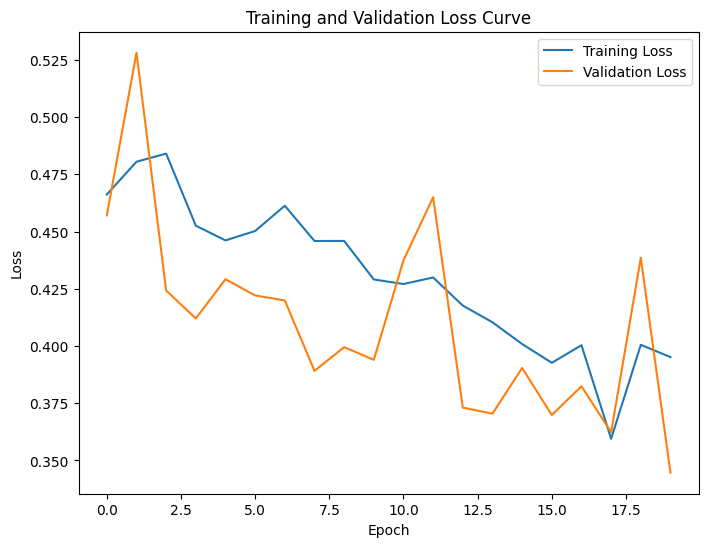

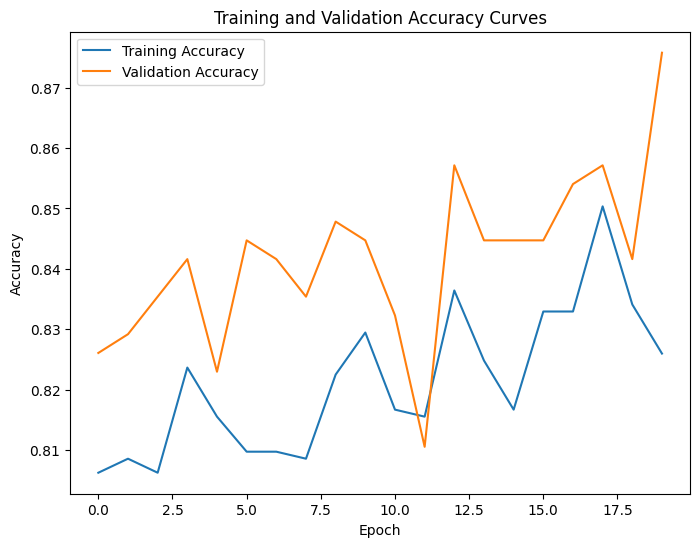

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(loss_list, label='Training Loss')
plt.plot(val_loss_list, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curve')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(acc_train_list, label='Training Accuracy')
plt.plot(acc_val_list, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Curves')
plt.legend()
plt.show()